# 1) Cleaning the Data

The last summer the world was shocked by the incredibly massive wildfires spreading all over the world. Canada, Greece and Syberia are just some of the countries which have suffered with enourmus area wiped out by the fire. Every year wildfires spread with increasing power and frequency. 

The main aim of this project is to study the evolution of the wildfire hazard in Europe trought machine learning clustering techniques. We will see that in the last 5 years the climate and geological condition of Europe are harsher than ever.

In [1]:
## Import libraries ##

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import xarray as xr
import os

We take the Fire danger indices historical data from the Copernicus Emergency Management Service (available at this link with a simple request: https://cds.climate.copernicus.eu/cdsapp#!/dataset/cems-fire-historical?tab=form)

The data goes from 1979 to 2021; for each year we select the first day of June, July, August and September, in order to focus only on the warmer season of the year. We have a single run with a resolution of 0.25 degree that cover the entire planet. The sea regions are recorded NaN values.

The features are:
1. **Build-up index:**  is a weighted combination of the Duff moisture code and Drought code to indicate the total amount of fuel available for combustion by a moving flame front.
2. **Burning index:** measures the difficulty of controlling a fire.
3. **Danger risk:** is equivalent to the FWI reduced to 6 classes of danger (very low, low, medium, high, very high and extreme).
4. **Drought code:** is an indicator of the moisture content in deep compact organic layers. This code represents a fuel layer at approximately 10-20 cm deep. 
5. **Duff moisture code:** is an indicatore of the moisture content in loosely-compacted organic layers of moderate depth. It is representative of the duff layer that is 5-10 cm deep.
6. **Energy release component:** is a number related to the available energy per unit area within the flaming front at the head of a fire.
7. **Fine fuel moisture code:** is an indicator of the moisture content in litter and other cured fine fuels (needles, mosses, twigs less than 1 cm in diameter). The Fine fuel moisture code is representative of the top litter layer less than 1-2 cm deep.
8. **Fire daily severity index:** Numeric rating of the difficulty of controlling fires.
9. **Fire danger index:** is a metric related to the chances of a fire starting, its rate of spread, its intensity, and its difficulty of suppression. 
10. **Fire weather index:** is a combination of Initial spread index and Build-up index, and is a numerical rating of the potential frontal fire intensity.
11. **Ignition component:** measures the probability a firebrand will require suppression action. Since it is expressed as a probability, it ranges on a scale of 0 to 100.
12. **Initial spread index:** combines the Fine fuel moisture code and wind speed to indicate the expected rate of fire spread.
13. **Keetch-Byram drought index:** is a number representing the net effect of evapotranspiration and precipitation in producing cumulative moisture deficiency in deep duff and upper soil layers.
14. **Spread component:**  is a measure of the spead at which a headfire would spread.

In [2]:
## Building file list ##

file_list = os.listdir('data/')
file_list = ['data/' + file for file in file_list]

## Importing data and create the Dataframe ##

ds = xr.open_mfdataset(file_list)
df = ds.to_dataframe()

df.reset_index(inplace=True)  
df.iloc[1027:1047]

,time,longitude,latitude,bi,bui,danger_risk,dc,dmc,dsr,erc,fdi,ffmc,fwi,ic,isi,kbdi,sc
1027,1979-06-01,0.25,13.50,6.0,142.267273,4.0,489.891174,111.671036,14.684595,4.0,14.159194,92.972443,34.967808,6.0,9.492609,183.304352,1.0
1028,1979-06-01,0.25,13.25,6.0,133.699142,4.0,473.811920,103.278008,15.257401,4.0,13.127750,93.735825,35.732010,6.0,10.111532,183.234879,1.0
1029,1979-06-01,0.25,13.00,0.0,112.377441,4.0,484.570923,79.126678,9.882483,3.0,12.492368,92.002701,27.957323,0.0,7.754878,185.364838,0.0
1030,1979-06-01,0.25,12.75,0.0,106.631828,4.0,446.545929,76.001717,8.506683,3.0,11.344601,91.532433,25.686956,0.0,7.096591,188.620621,0.0
1031,1979-06-01,0.25,12.50,0.0,64.198685,3.0,385.562073,40.536301,4.655110,4.0,9.692187,90.636497,18.271994,0.0,6.364440,178.441147,0.0
1032,1979-06-01,0.25,12.25,5.0,73.728317,3.0,353.167358,49.880726,4.622070,3.0,8.707620,89.567505,18.198610,5.0,5.719421,171.566895,1.0
1033,1979-06-01,0.25,12.00,4.0,56.724094,3.0,342.778870,35.758919,3.937125,2.0,8.748888,89.979149,16.622021,5.0,6.129801,174.594009,1.0
1034,1979-06-01,0.25,11.75,4.0,68.779213,3.0,356.545013,45.316914,4.125320,2.0,8.724778,89.240921,17.066345,5.0,5.519665,183.352066,1.0
1035,1979-06-01,0.25,11.50,4.0,81.195206,4.0,293.261719,62.084087,6.796293,2.0,8.764113,91.060112,22.627396,5.0,7.204029,172.812851,1.0
1036,1979-06-01,0.25,11.25,4.0,81.195206,4.0,293.261719,62.084087,6.796293,2.0,8.764113,91.060112,22.627396,5.0,7.204029,172.812851,1.0


We are interested in european region; therefore, we define european borders and reorder the longitude within a range of [-15:45] in order to obtain recognizable maps in the future.

In [3]:
#European borders

LAT_LOWER = 35
LAT_UPPER = 70
LON_LOWER = 345
LON_UPPER = 45

def setborders (df):
    if df > LON_LOWER:
        return df - 360
    else:
        return df

In [4]:
## Order longitude from -15 to 45 ##

df['longitude'] = df['longitude'].apply(lambda x: setborders(x))

## Select european data ##

boundary = ((df['longitude'] > LON_LOWER) | (df['longitude'] < LON_UPPER) &
           (df['latitude'] > LAT_LOWER) & (df['latitude'] < LAT_UPPER))
df = df[boundary]

## Drop NaN values ##

df = df.dropna()
df.head(10)

,time,longitude,latitude,bi,bui,danger_risk,dc,dmc,dsr,erc,fdi,ffmc,fwi,ic,isi,kbdi,sc
143,1979-06-01,0.0,54.25,0.0,1.234493,1.0,4.941989,0.897482,0.000014,0.0,0.993548,39.412701,0.014061,0.0,0.051276,0.475582,0.0
144,1979-06-01,0.0,54.00,0.0,1.434389,1.0,5.105268,1.163779,0.000305,0.0,1.252137,46.037491,0.060601,0.0,0.201392,0.509765,0.0
145,1979-06-01,0.0,53.75,0.0,1.637558,1.0,5.202592,1.423807,0.000691,0.0,1.397826,50.706917,0.105707,0.0,0.344205,0.640720,0.0
146,1979-06-01,0.0,53.50,0.0,2.751742,1.0,5.721916,2.786665,0.003487,0.0,2.334723,65.214951,0.306033,0.0,0.884310,0.980370,0.0
147,1979-06-01,0.0,53.25,0.0,3.178726,1.0,5.741457,3.306364,0.004231,1.0,2.449987,67.533035,0.344144,0.0,0.949178,1.028400,0.0
148,1979-06-01,0.0,53.00,0.0,3.484967,1.0,5.768286,3.677592,0.005964,0.0,2.470121,69.741829,0.420546,1.0,1.127203,1.019099,0.0
149,1979-06-01,0.0,52.75,2.0,4.860170,1.0,5.957976,5.203814,0.011915,1.0,2.988046,75.339584,0.624556,1.0,1.467281,1.025165,1.0
150,1979-06-01,0.0,52.50,3.0,4.774302,1.0,6.011105,5.106088,0.012087,1.0,3.140026,75.157928,0.630018,2.0,1.491007,1.068498,1.0
151,1979-06-01,0.0,52.25,3.0,4.066279,1.0,5.913762,4.337929,0.009242,1.0,2.917767,72.450546,0.543047,2.0,1.375435,0.961093,1.0
152,1979-06-01,0.0,52.00,3.0,4.066279,1.0,5.913762,4.337929,0.009242,1.0,2.917767,72.450546,0.543047,2.0,1.375435,0.961093,1.0


We can think about our data as a series of maps for each index at each time. Below we have an example of FWI data on 1 September 2020.

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

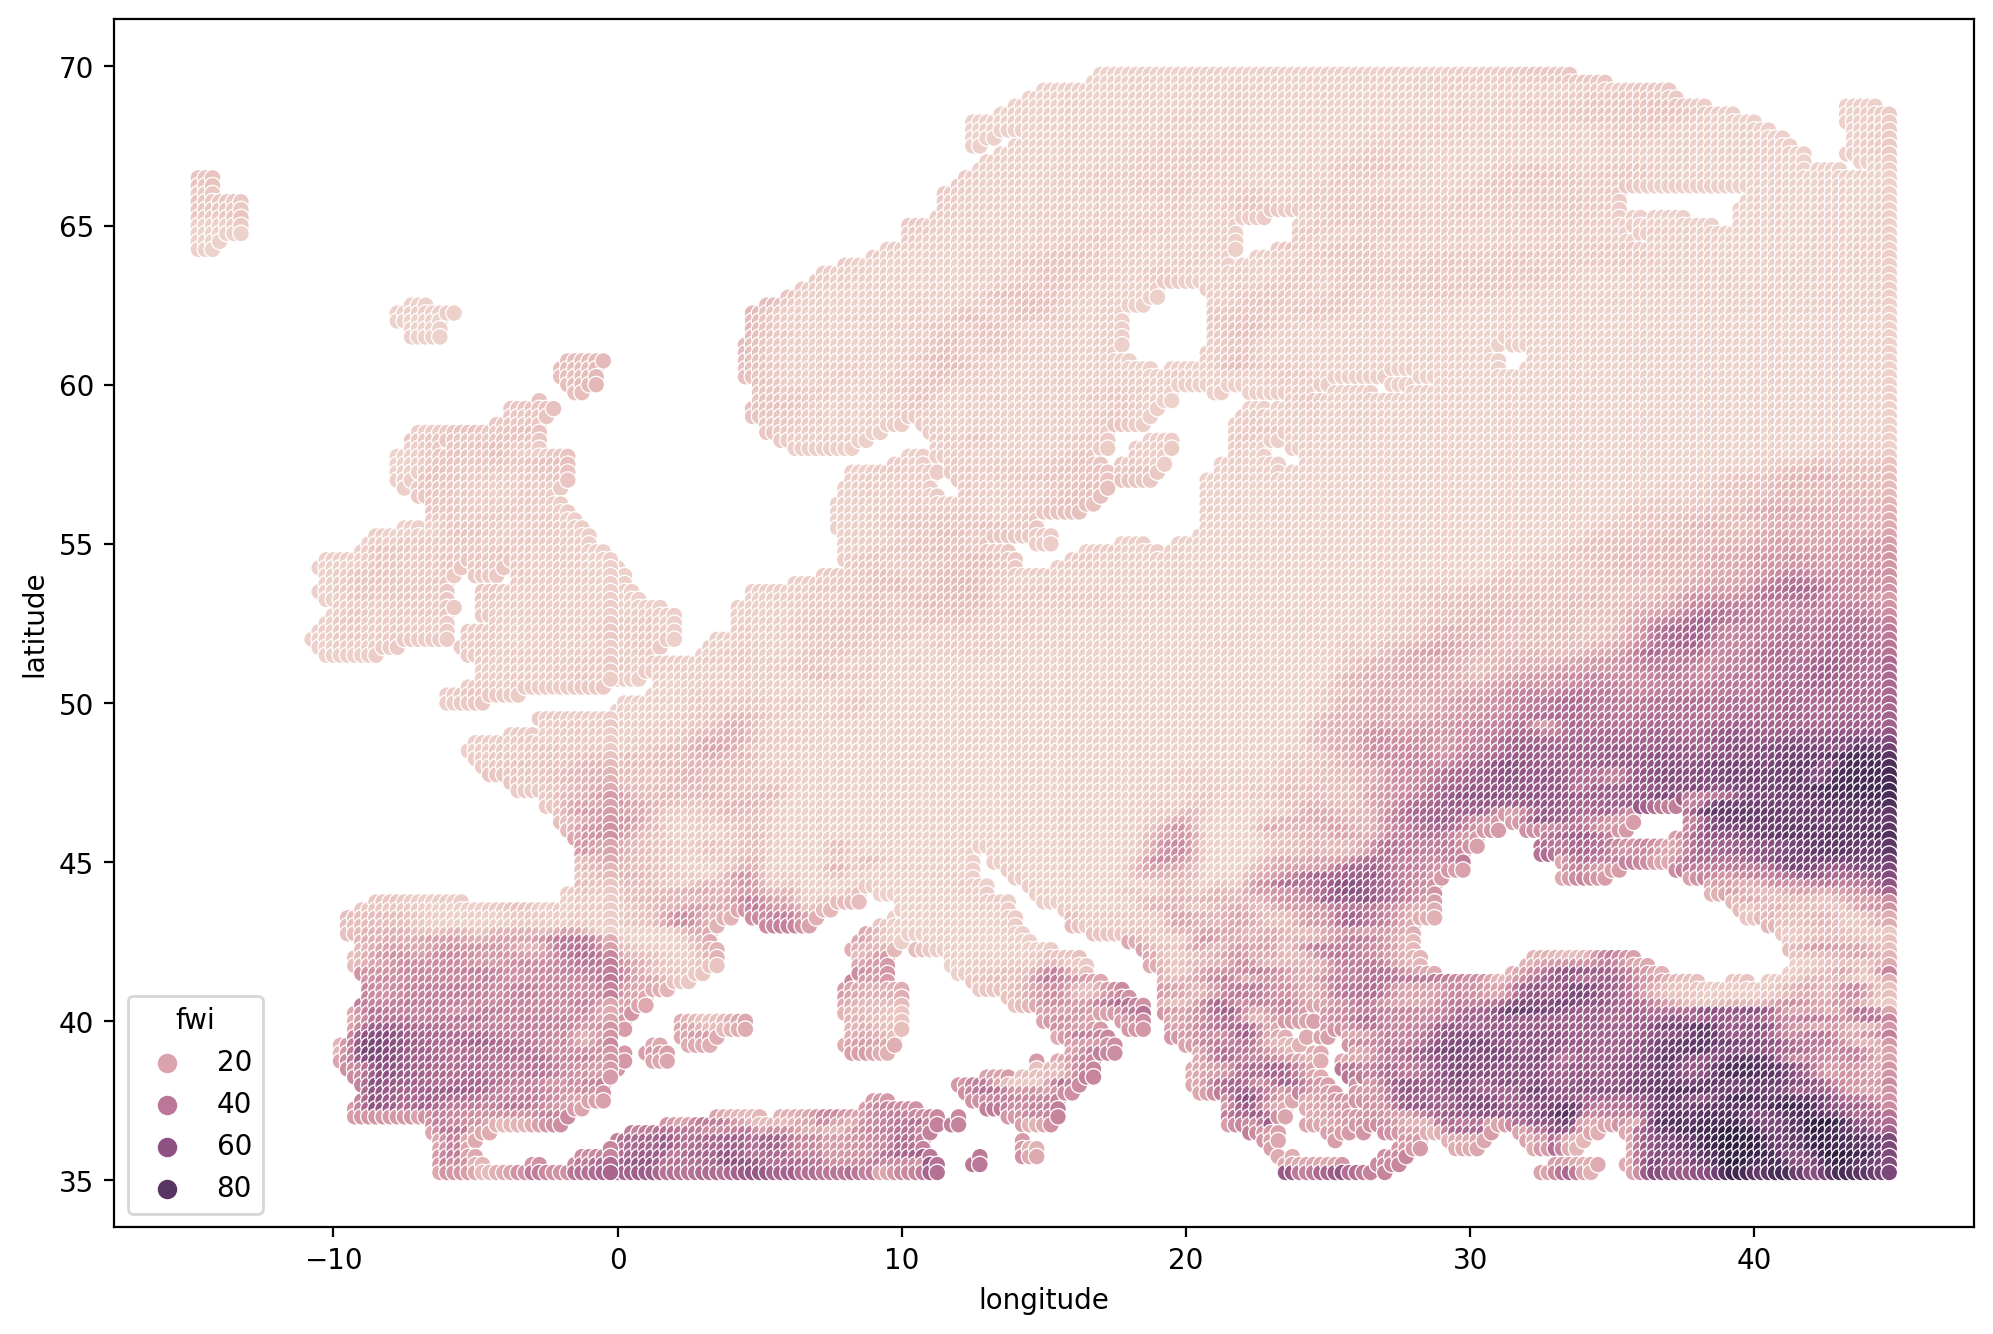

In [5]:
example = df[df['time'] == '2020-09-01']

plt.figure(figsize=(12,8), dpi=200)
sns.scatterplot(data=example, x='longitude', y='latitude', hue='fwi')

Once we have dropped the unnecessary rows, we select the features in which we are interested, dropping the ones that repeat the same information.

<AxesSubplot:>

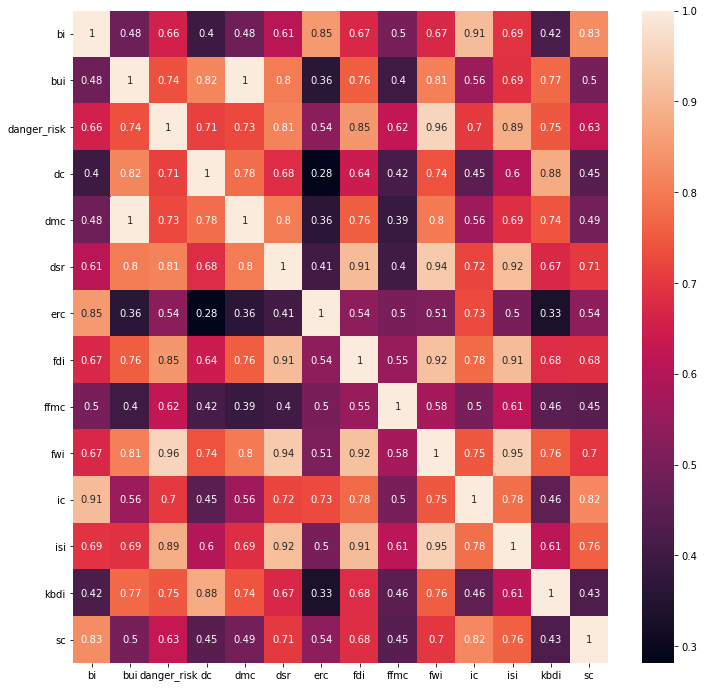

In [6]:
plt.figure(figsize=(12,12))
sns.heatmap(df.drop(['latitude','longitude'],axis=1).corr(), annot=True)

Observing the correlation heatmap we see that DMC and BUI have complete correlation. This means that the two features are reduntant and we can drop BUI. For the same reason we drop also FWI, DSR and FDI.

In [7]:
df = df.drop(['bui','fwi','dsr','fdi'], axis=1)

<AxesSubplot:>

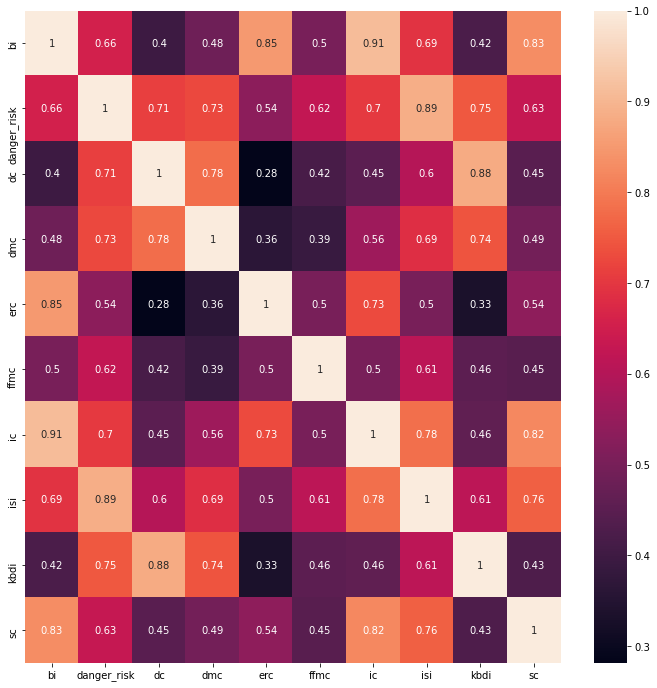

In [8]:
plt.figure(figsize=(12,12))
sns.heatmap(df.drop(['latitude','longitude'],axis=1).corr(), annot=True)

The last thing to do in this section is to save with a pkl file our data.

In [9]:
df.to_pickle('Fire_danger.pkl')